In [4]:
import main
from pars_shocks import Pars, Shocks
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

# ***** may want to change how trans is generated its redundant in do file.
of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
k2_input_path = main_path + "input/k2_moms/"
age_type_input_path = main_path + "input/50p_age_moms/"

trans_full_path = age_type_input_path + "MH_trans_by_MH_clust_age.csv"  
trans_uncond_age_path = age_type_input_path + "MH_trans_uncond_age.csv"

H_type_pop_share_path = age_type_input_path + "MH_clust_50p_age_pop_shares.csv"

# trans_full_path = k2_input_path + "MH_trans_by_MH_clust_age.csv"
# trans_uncond_age_path = k2_input_path + "MH_trans_uncond_age.csv"
# trans_test_path = k2_input_path + "MH_trans_test.csv"

# H_type_pop_share_path = k2_input_path + "MH_clust_k2_pop_shares.csv"

myPars = main.pars_factory(main_path, H_type_pop_share_path = H_type_pop_share_path)
myPars.H_trans = io_manager.read_and_shape_H_trans_full(myPars, path = trans_full_path) 
# myPars.H_trans = io_manager.read_and_shape_H_trans_uncond_age(myPars, trans_uncond_age_path)
myPars, myShocks, sols, sims = main.main_io(main_path, myPars = myPars, out_folder_name = of_name)

Running main
Using default health transition matrix
*****Running main_io with default out_folder_name*****
Solver ran in 0.39067179999983637 seconds
Calibrating with alpha_lab_targ = 0.31842728882352944, w0_mean_targ = 9.4541645, w0_sd_targ = 3.2013602, w1_targ = 0.3406973883314617, w2_targ = 0.3031905120658842, wH_targ = 0.045841124
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
***** Calibration iteration 11 *****
***** Calibration iteration 12 *****
***** Calibration iteration 13 *****
Calibration converged after 14 iterations
w0_weights = [0.28446843 0.5945802  0.11914484 0.00180653], w0_mean = 9.454974106645013, w0_mean_targ = 9.4541645


In [5]:
from pars_shocks import Pars, Shocks
myShocks = Shocks(myPars)
H_hist = myShocks.H_hist
beg = H_hist[:, :, :, 0]
share_good_beg = np.mean(beg)
share_bad_beg = 1 - share_good_beg
print(f"share_bad_beg: {share_bad_beg}, share_good_beg: {share_good_beg}")

share_bad_beg: 0.4325, share_good_beg: 0.5675


bad_MH_age_data [[25.          0.48086292]
 [26.          0.49060541]
 [27.          0.47693351]
 [28.          0.45721585]
 [29.          0.46135554]
 [30.          0.45675677]
 [31.          0.45019531]
 [32.          0.45513114]
 [33.          0.45746103]
 [34.          0.45014977]
 [35.          0.46066043]
 [36.          0.44040641]
 [37.          0.45077521]
 [38.          0.45464683]
 [39.          0.44743544]
 [40.          0.4403733 ]
 [41.          0.43497604]
 [42.          0.41758242]
 [43.          0.42659187]
 [44.          0.41663989]
 [45.          0.42879847]
 [46.          0.43285939]
 [47.          0.42549205]
 [48.          0.41474217]
 [49.          0.42959058]
 [50.          0.42214534]
 [51.          0.4219892 ]
 [52.          0.43219796]
 [53.          0.42875278]
 [54.          0.41366908]
 [55.          0.42387769]
 [56.          0.41827244]
 [57.          0.41554961]
 [58.          0.40721998]
 [59.          0.38550135]
 [60.          0.37898424]
 [61.       

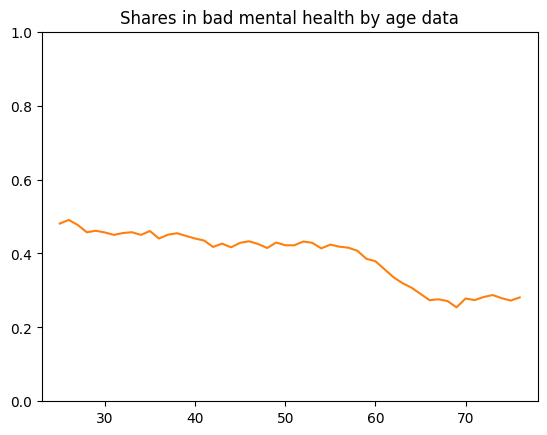

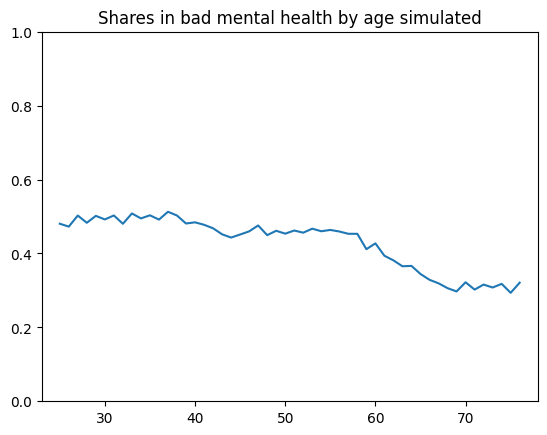

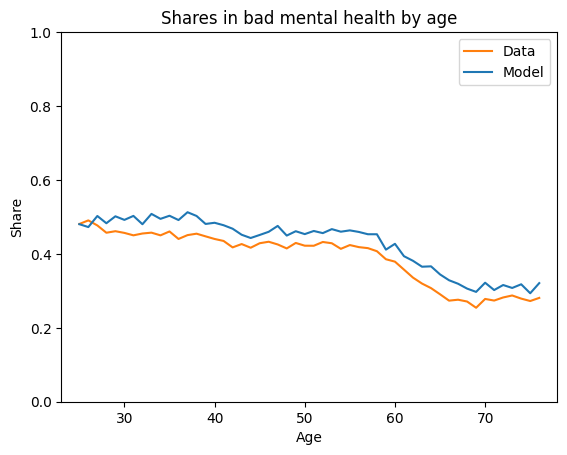

In [6]:
import model_uncert as model
import matplotlib.pyplot as plt
import pandas as pd
import my_toolbox as tb
import os

H_hist = myShocks.H_hist

shares_y_lim = [0, 1.0]
# shares in bad health by earnings (maybe later by wage, hours, etc)
age_grid = myPars.age_grid
bad_MH_age_data = pd.read_csv(k2_input_path + "mean_bad_MH_by_age.csv")
# get second column as numpy array
bad_MH_age_data = bad_MH_age_data.to_numpy()
print("bad_MH_age_data", bad_MH_age_data)
# plot shares in bad health by age
fig_bad_MH_data, ax_bad_MH_data = plt.subplots()
ax_bad_MH_data.plot(age_grid, bad_MH_age_data)
ax_bad_MH_data.set_title("Shares in bad mental health by age data")
ax_bad_MH_data.set_xlim([age_grid[0]-2, age_grid[-1]+2])    
ax_bad_MH_data.set_ylim(shares_y_lim)
plt.show()

# model shares in bad health by age
weighted_H_hist = model.gen_weighted_sim(myPars, H_hist) 
good_MH_age_sim = np.sum(weighted_H_hist, tuple(range(H_hist.ndim - 1)))
bad_MH_age_sim = 1 - good_MH_age_sim
# print("good_MH_age_sim", good_MH_age_sim)
# print("bad_MH_age_sim", bad_MH_age_sim)
fig_bad_MH_sim, ax_bad_MH_sim = plt.subplots()
ax_bad_MH_sim.plot(age_grid, bad_MH_age_sim)
ax_bad_MH_sim.set_title("Shares in bad mental health by age simulated")
ax_bad_MH_sim.set_xlim([age_grid[0]-2, age_grid[-1]+2])
ax_bad_MH_sim.set_ylim(shares_y_lim)
plt.show()

label_lists = [["Data"], ["Model"]]
color_list = ["C1", "C0"]
corr_save_path = main_path + "output/H_trans_state_test/"
#if directory doesn't exist create it
if not os.path.exists(corr_save_path):
    os.makedirs(corr_save_path)

fig_comb_bad_MH, ax_comb_bad_MH = tb.combine_plots([(fig_bad_MH_data, ax_bad_MH_data), (fig_bad_MH_sim, ax_bad_MH_sim)],
                                                    comb_fig_title = "Shares in bad mental health by age", x_label = "Age", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, save_path = corr_save_path + "shares_bad_MH.pdf")